# Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

%matplotlib inline

---

# TOC

- [Demo-1](#Demo-1)
- [Demo-2](#Demo-2)
    - Dynamic plots with Bokeh
    - Save File

---

# Demo-1

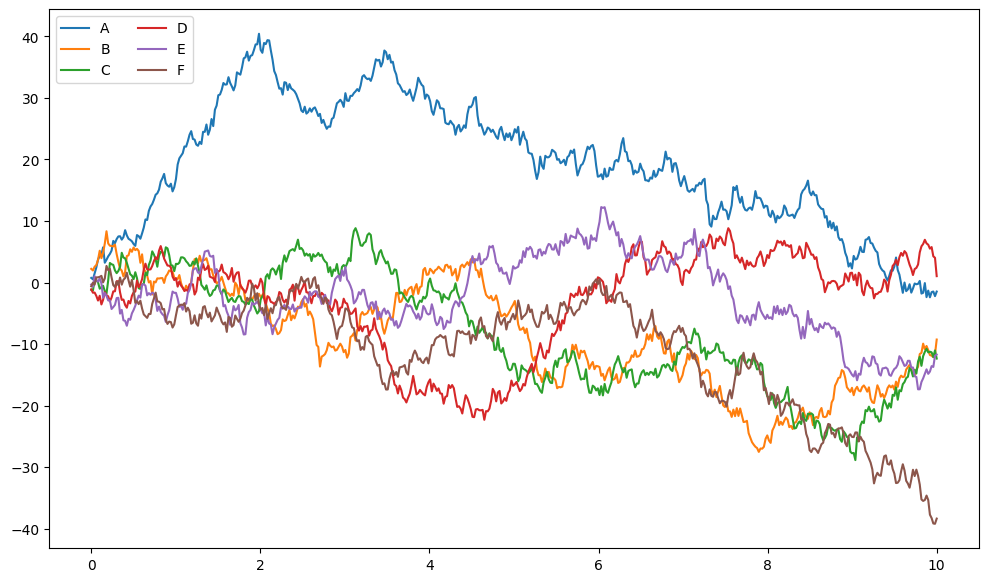

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend("ABCDEF", ncol=2, loc="upper left")

---

# Demo-2
- Working with code

In [3]:
# https://api.kraken.com/0/public/OHLC?pair=XBTUSD&interval=60&since=1704305938
def get_historic_price(symbol, after="2018-09-01"):
    url = "https://api.kraken.com/0/public/OHLC"
    pair = f"{symbol.upper()}USD"  # XBTUSD when symbol='xbt' for example

    resp = requests.get(
        url,
        params={
            "pair": pair,
            "interval": 60,
            "since": str(int(pd.Timestamp(after).timestamp())),
        },
    )
    resp.raise_for_status()

    data = resp.json()

    # print(data["result"].keys())

    results_key = [k for k in data["result"].keys() if k != "last"][0]

    # print(results_key)

    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count) in data["result"][
            results_key
        ]
    ]
    df = pd.DataFrame(
        results,
        columns=[
            "CloseTime",
            "OpenPrice",
            "HighPrice",
            "LowPrice",
            "ClosePrice",
            "Volume",
        ],
    )
    df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")
    df.set_index("CloseTime", inplace=True)
    return df

In [4]:
last_week = pd.Timestamp.now() - pd.offsets.Day(7)
last_week

Timestamp('2024-01-04 12:08:58.487273')

In [5]:
btc = get_historic_price("btc", after=last_week)
eth = get_historic_price("eth", after=last_week)

In [6]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-01-04 13:00:00,43404.0,43514.0,43207.8,43418.0,96.801098
2024-01-04 14:00:00,43418.1,43745.1,43321.1,43700.8,241.774436
2024-01-04 15:00:00,43700.9,44312.9,43661.5,44118.5,505.326482
2024-01-04 16:00:00,44118.5,44179.0,43825.0,43961.9,234.418469
2024-01-04 17:00:00,43961.9,44241.9,43866.5,44056.5,171.092844


In [7]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2024-01-04 13:00:00 to 2024-01-11 04:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   160 non-null    float64
 1   HighPrice   160 non-null    float64
 2   LowPrice    160 non-null    float64
 3   ClosePrice  160 non-null    float64
 4   Volume      160 non-null    float64
dtypes: float64(5)
memory usage: 7.5 KB


<Axes: xlabel='CloseTime'>

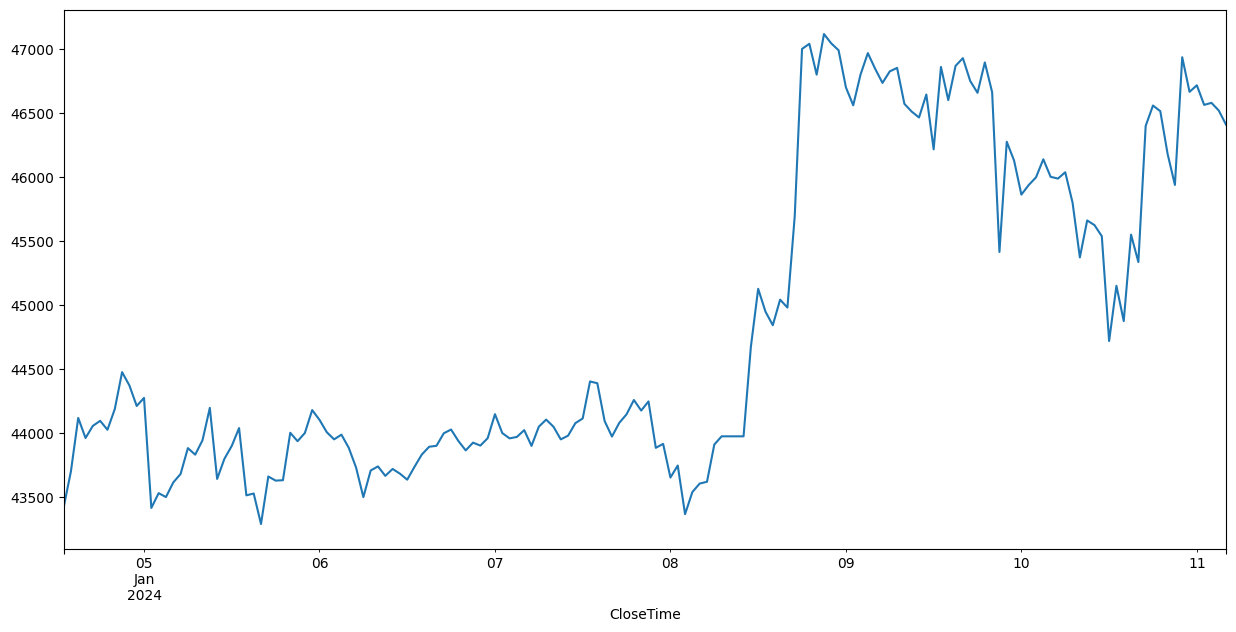

In [8]:
btc["ClosePrice"].plot(figsize=(15, 7))

In [9]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-01-04 13:00:00,2237.75,2248.94,2235.09,2242.27,274.538149
2024-01-04 14:00:00,2242.27,2274.98,2233.77,2274.98,620.993628
2024-01-04 15:00:00,2274.98,2284.99,2266.00,2279.02,1388.259030
2024-01-04 16:00:00,2278.93,2282.84,2262.29,2271.75,2172.460073
2024-01-04 17:00:00,2272.44,2290.01,2270.68,2277.70,1627.197302


<Axes: xlabel='CloseTime'>

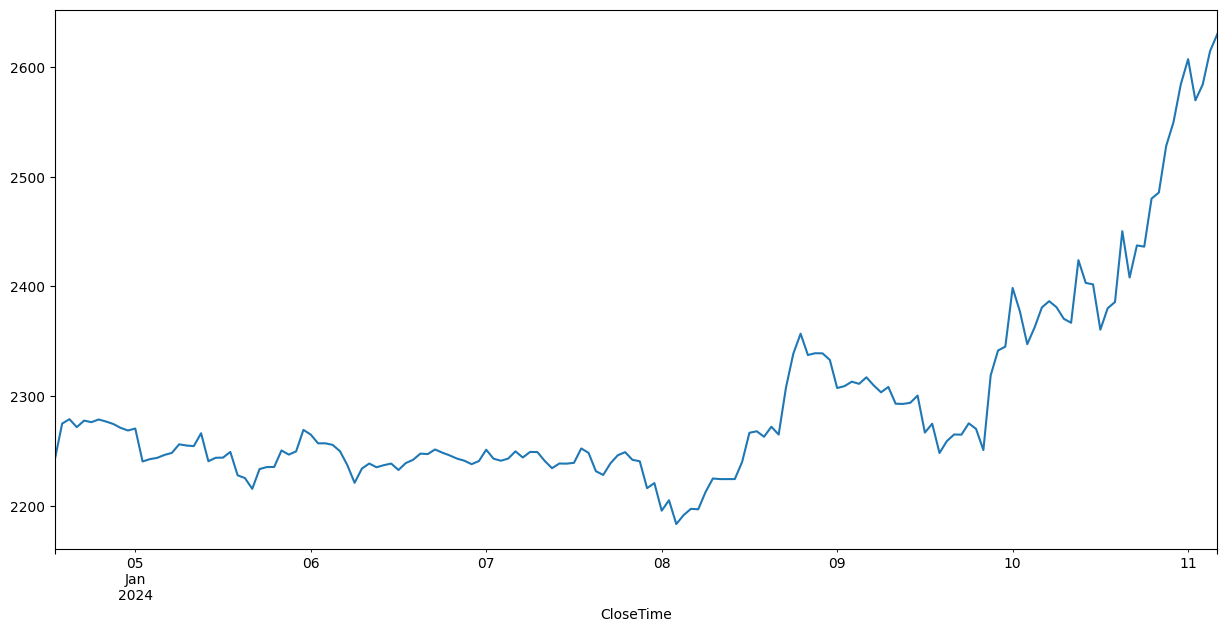

In [10]:
eth["ClosePrice"].plot(figsize=(15, 7))

## Dynamic plots with Bokeh

In [11]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show

In [12]:
output_notebook()

Loading BokehJS ...

In [13]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = "Date"
p1.yaxis.axis_label = "Price"

p1.line(btc.index, btc["ClosePrice"], color="#f2a900", legend_label="Bitcoin")
# p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

## Save File
- Exporting Excel

In [15]:
writer = pd.ExcelWriter("../../../datasets/xlsx_datasets/cryptos.xlsx")

btc.to_excel(writer, sheet_name="Bitcoin")
eth.to_excel(writer, sheet_name="Ether")

writer._save()